In [29]:
import matplotlib
from PyEMD import EMD
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler
%load_ext autoreload 
%autoreload 2
%matplotlib widget
import matplotlib.pyplot as plt
#matplotlib.use("nbagg")
from rbm_robust.data_loading.datasets import D02Dataset
import pandas as pd
import numpy as np
from scipy import signal
from neurokit2 import ecg_peaks
from emrad_toolbox.plotting.radar_plotting.RadarPlotter import RadarPlotter
from emrad_toolbox.radar_preprocessing.radar import RadarPreprocessor
from sklearn.preprocessing import MinMaxScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
base_path = "/Users/simonmeske/Desktop/TestOrdner"
dataset = D02Dataset(base_path)

In [3]:
subset = dataset[0]
print(subset.synced_data.index.min())
print(subset.synced_data.index.max())

2023-03-03 17:12:20+01:00
2023-03-03 18:53:45.979000+01:00


In [4]:
start_time = "17:20:12"
end_time = "17:20:13"
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time)

In [5]:
r_peaks = ecg_peaks(filtered_synced['ecg'], sampling_rate=1000)[0]['ECG_R_Peaks']
indices = [i for i, x in enumerate(r_peaks) if x == 1]

In [6]:
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time)
print(filtered_synced_comp[['ecg']].to_numpy())


[[ 0.02696365]
 [ 0.02922164]
 [ 0.02915131]
 ...
 [-0.04601014]
 [-0.03955626]
 [-0.03509629]]


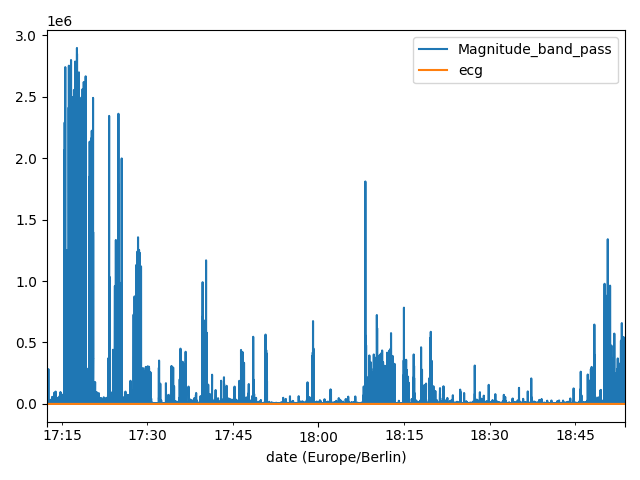

In [19]:
start_time = "17:25:44"
end_time = "17:55:57"
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time)
fig, ax = plt.subplots()
filtered_synced_comp[['Magnitude_band_pass','ecg']].plot(ax=ax)
fig.tight_layout()

/var/folders/qf/zht5hqpj2fsbfncxb2dwlb4h0000gn/T/ipykernel_5148/781857588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_synced_comp['Magnitude_band_pass'] = min_max_scaler.fit_transform(filtered_synced_comp[['Magnitude_band_pass']])
/var/folders/qf/zht5hqpj2fsbfncxb2dwlb4h0000gn/T/ipykernel_5148/781857588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_synced_comp['ecg'] = min_max_scaler.fit_transform(filtered_synced_comp[['ecg']])


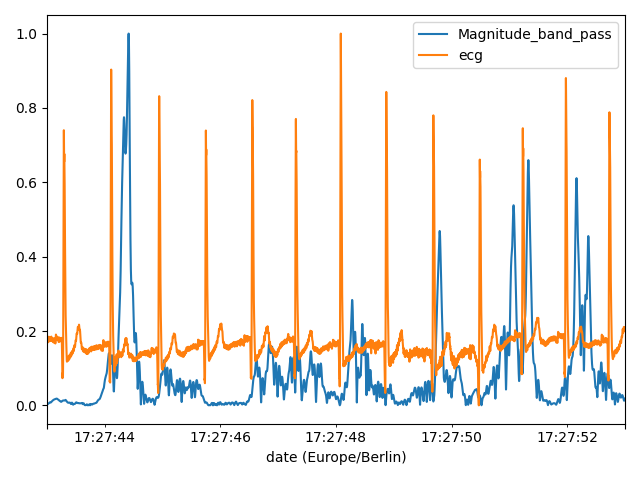

In [8]:
start_time = "17:27:43"
end_time = "17:27:53"
fig, ax = plt.subplots()
filtered_synced_comp = subset.synced_filtered_data.between_time(start_time, end_time)
min_max_scaler = MinMaxScaler()
filtered_synced_comp['Magnitude_band_pass'] = min_max_scaler.fit_transform(filtered_synced_comp[['Magnitude_band_pass']])
filtered_synced_comp['ecg'] = min_max_scaler.fit_transform(filtered_synced_comp[['ecg']])
filtered_synced_comp[['Magnitude_band_pass','ecg']].plot(ax=ax)
fig.tight_layout()

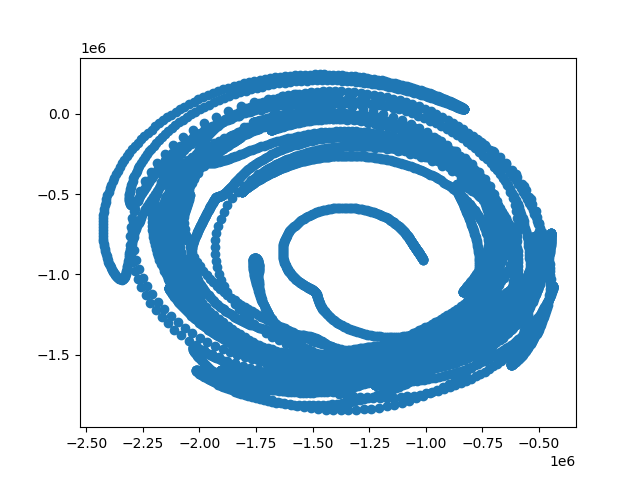

In [33]:
fig, ax  = plt.subplots()
synced = subset.synced_data.between_time(start_time, end_time)
ax.scatter(synced[['radar_I']], synced[['radar_Q']])

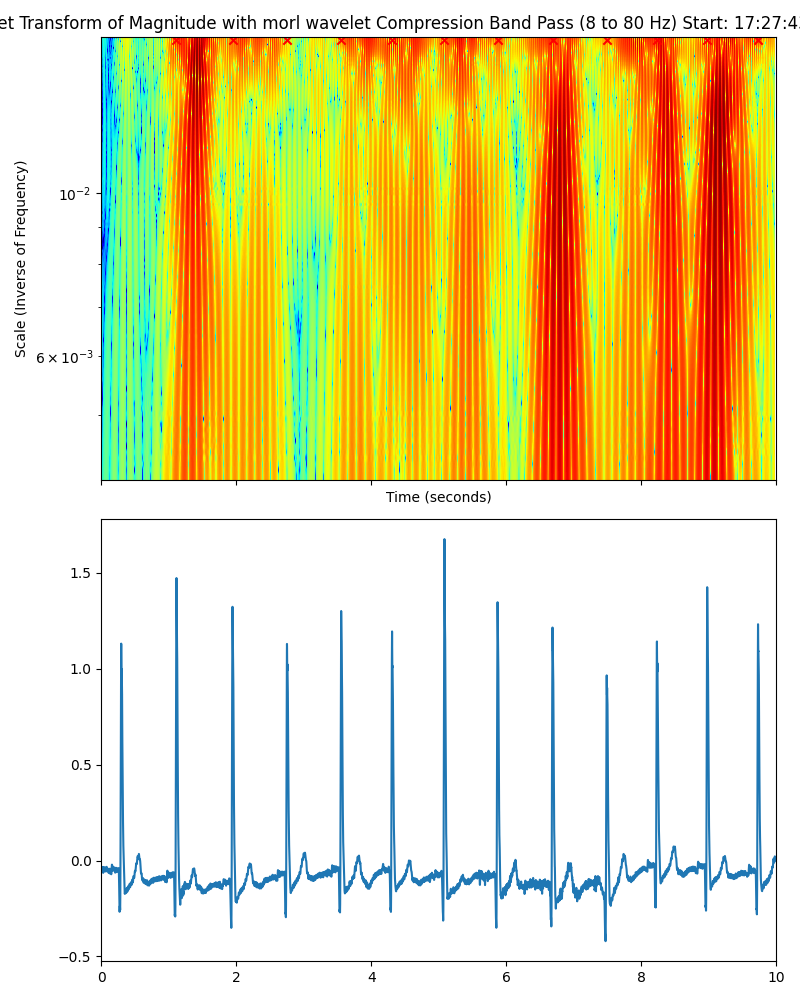

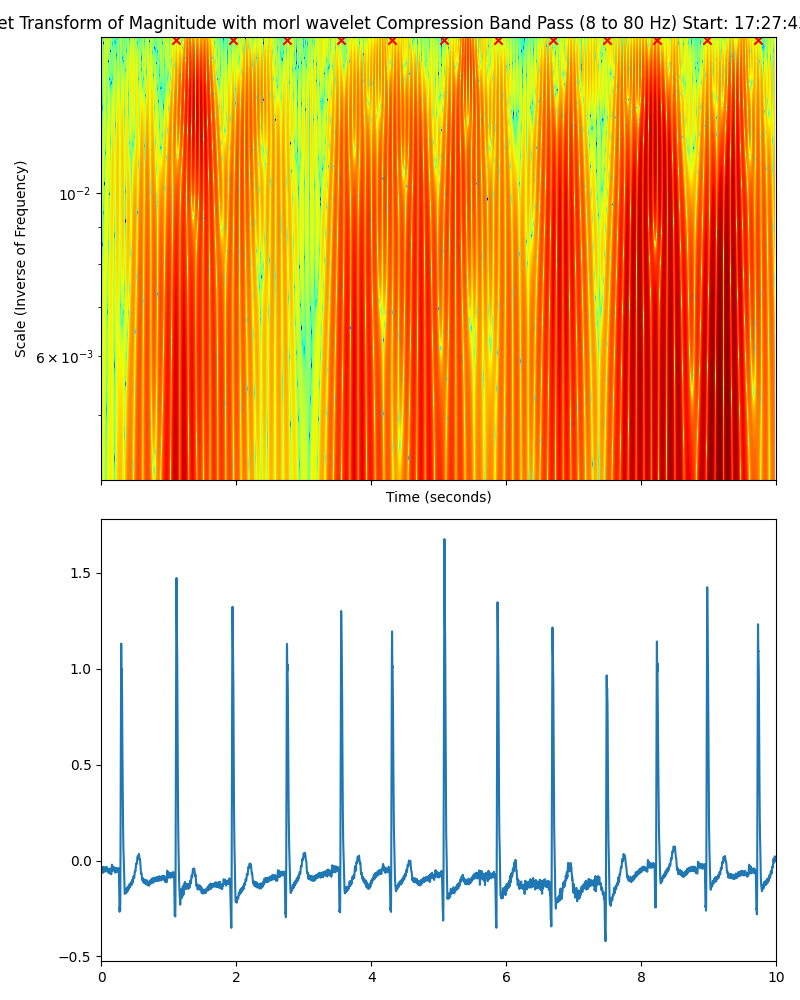

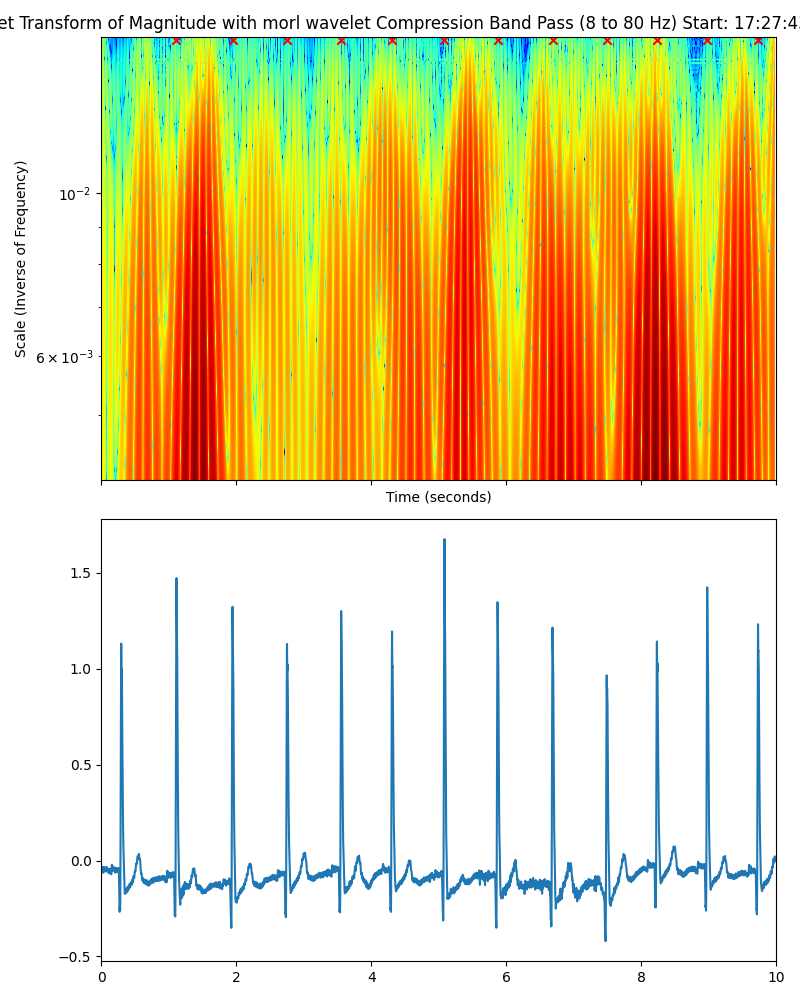

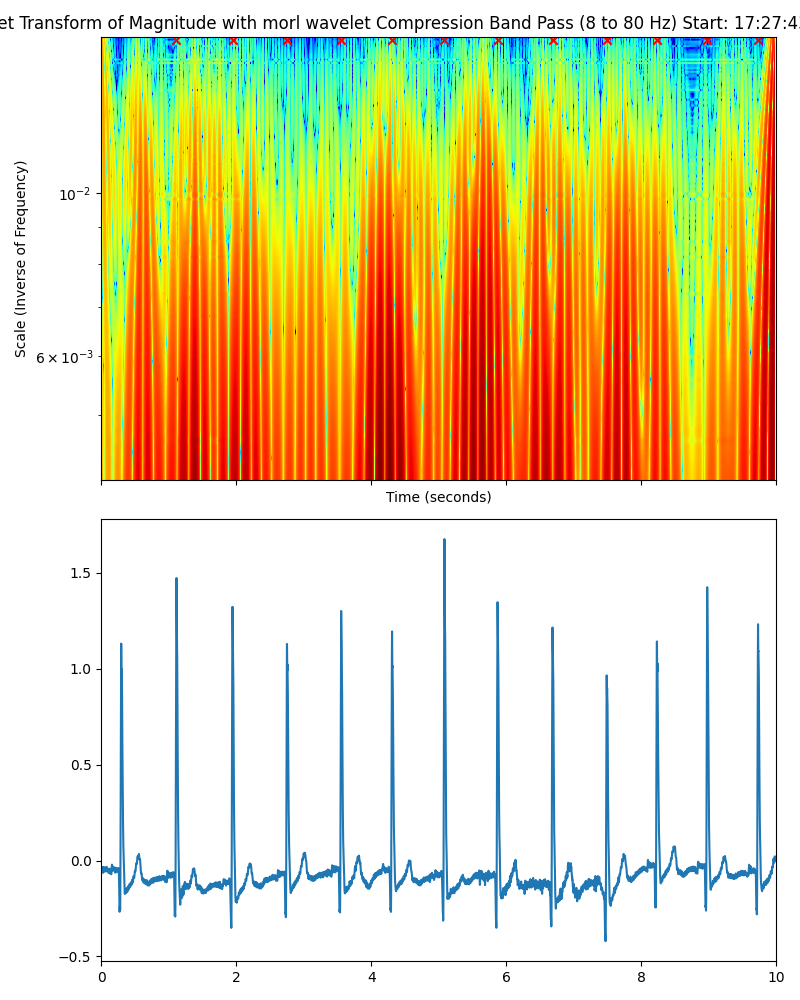

In [25]:
start_time = "17:27:43"
end_time = "17:27:53"
filtered_synced = subset.synced_filtered_data.between_time(start_time, end_time)
r_peaks = ecg_peaks(filtered_synced['ecg'], sampling_rate=1000)[0]['ECG_R_Peaks']
emd = EMD()
imfs = emd.emd(filtered_synced['Magnitude_band_pass'].to_numpy(), np.arange(len(filtered_synced)) / 1000, max_imf=3)
num_imfs = imfs.shape[0]
for i in range(num_imfs):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 10))
    ax1.scatter(np.arange(len(filtered_synced)) / 1000, r_peaks / 62, c='red', marker='x')
    RadarPlotter.plot_wavelet(imfs[i], sampling_rate=1000, signal_type=f"Compression Band Pass (8 to 80 Hz) Start: {start_time} End: {end_time}", log_scale=True, wavelet_coefficients=(50,200), ax=ax1,  **{"color_bar": False})
    ax2.plot(np.arange(len(filtered_synced)) / 1000, filtered_synced['ecg'])
    fig.tight_layout()

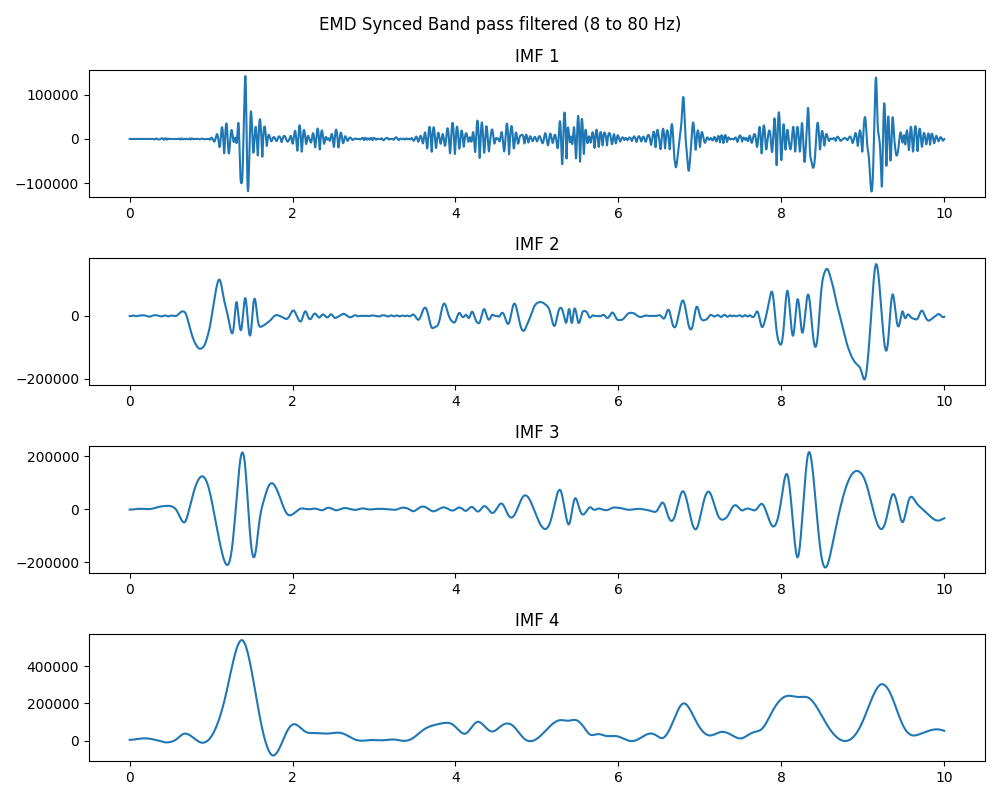

In [30]:
RadarPlotter.plot_emd(radar_signal=filtered_synced['Magnitude_band_pass'].to_numpy(), sampling_rate=1000, signal_type="Synced Band pass filtered (8 to 80 Hz)", max_imfs=3);

In [4]:
subset.synced_data.head()

acq_aligned_           radar_aligned_  \
                                         sync       ecg              I   
date (Europe/Berlin)                                                     
2023-03-03 17:12:20+01:00                 1.0 -0.001636  -6.804459e+05   
2023-03-03 17:12:20.001000+01:00          1.0  0.000109  -1.458421e+06   
2023-03-03 17:12:20.002000+01:00          1.0 -0.000607  -1.290062e+06   
2023-03-03 17:12:20.003000+01:00          1.0 -0.000661  -1.361458e+06   
2023-03-03 17:12:20.004000+01:00          1.0 -0.000855  -1.326654e+06   

                                                        
                                             Q Sync_In  
date (Europe/Berlin)                                    
2023-03-03 17:12:20+01:00        -5.007925e+05     1.0  
2023-03-03 17:12:20.001000+01:00 -1.075309e+06     1.0  
2023-03-03 17:12:20.002000+01:00 -9.488686e+05     1.0  
2023-03-03 17:12:20.003000+01:00 -1.015889e+06     1.0  
2023-03-03 17:12:20.004000+01:00 -9.969720e+05     1.0

In [5]:
ecg_data = subset.ecg
radar_data = subset.radar.droplevel(0, axis=1)

In [14]:
synced_sample = subset.synced_data
synced_sample

acq_aligned_           radar_aligned_  \
                                         sync       ecg              I   
date (Europe/Berlin)                                                     
2023-03-03 17:12:20+01:00                 1.0  0.271209  -9.761431e+05   
2023-03-03 17:12:20.001000+01:00          1.0  0.233492  -1.441969e+06   
2023-03-03 17:12:20.002000+01:00          1.0  0.167071  -1.261498e+06   
2023-03-03 17:12:20.003000+01:00          1.0  0.075204  -1.377024e+06   
2023-03-03 17:12:20.004000+01:00          1.0 -0.030544  -1.297069e+06   
...                                       ...       ...            ...   
2023-03-03 18:53:45.975000+01:00          0.0 -0.005259  -1.281461e+06   
2023-03-03 18:53:45.976000+01:00          0.0 -0.010312  -1.281248e+06   
2023-03-03 18:53:45.977000+01:00          0.0 -0.015268  -1.280798e+06   
2023-03-03 18:53:45.978000+01:00          0.0 -0.019479  -1.280280e+06   
2023-03-03 18:53:45.979000+01:00          0.0 -0.022737  -1.279929e+06   

                                                        
                                             Q Sync_In  
date (Europe/Berlin)                                    
2023-03-03 17:12:20+01:00        -7.265709e+05     1.0  
2023-03-03 17:12:20.001000+01:00 -1.072870e+06     1.0  
2023-03-03 17:12:20.002000+01:00 -9.378944e+05     1.0  
2023-03-03 17:12:20.003000+01:00 -1.023372e+06     1.0  
2023-03-03 17:12:20.004000+01:00 -9.634809e+05     1.0  
...                                        ...     ...  
2023-03-03 18:53:45.975000+01:00 -3.843772e+05     0.0  
2023-03-03 18:53:45.976000+01:00 -3.844911e+05     0.0  
2023-03-03 18:53:45.977000+01:00 -3.845403e+05     0.0  
2023-03-03 18:53:45.978000+01:00 -3.846962e+05     0.0  
2023-03-03 18:53:45.979000+01:00 -3.846575e+05     0.0  

[6085980 rows x 5 columns]

In [16]:
fig, ax = plt.subplots()
radar_sample = synced_sample[[("radar_aligned_","Sync_In"),("acq_aligned_","sync")]].between_time("17:20:00", "17:22:00")
radar_sample.columns.names = ["device", "channel"]
radar_sample.plot(ax=ax)
fig.tight_layout()

<IPython.core.display.Javascript object>

In [46]:
synced_sample = subset.synced_data
synced_sample.columns

Index(['ecg', 'radar_I', 'radar_Q'], dtype='object')

In [47]:
synced_sample.head()

,ecg,radar_I,radar_Q
date (Europe/Berlin),,,
2023-03-03 17:12:20+01:00,0.271209,-9.761431e+05,-7.265709e+05
2023-03-03 17:12:20.001000+01:00,0.233492,-1.441969e+06,-1.072870e+06
2023-03-03 17:12:20.002000+01:00,0.167071,-1.261498e+06,-9.378944e+05
2023-03-03 17:12:20.003000+01:00,0.075204,-1.377024e+06,-1.023372e+06
2023-03-03 17:12:20.004000+01:00,-0.030544,-1.297069e+06,-9.634809e+05


In [30]:
synced_sample.head()

,ecg_aligned__sync,ecg_aligned__ecg,radar_aligned__I,radar_aligned__Q,radar_aligned__Sync_In
date (Europe/Berlin),,,,,
2023-03-03 17:12:20+01:00,1.0,0.271209,-9.761431e+05,-7.265709e+05,1.0
2023-03-03 17:12:20.001000+01:00,1.0,0.233492,-1.441969e+06,-1.072870e+06,1.0
2023-03-03 17:12:20.002000+01:00,1.0,0.167071,-1.261498e+06,-9.378944e+05,1.0
2023-03-03 17:12:20.003000+01:00,1.0,0.075204,-1.377024e+06,-1.023372e+06,1.0
2023-03-03 17:12:20.004000+01:00,1.0,-0.030544,-1.297069e+06,-9.634809e+05,1.0


In [24]:

fig, ax = plt.subplots()
filtered_synced = subset.synced_filtered_data.between_time("17:20:10", "17:20:20")
# Z-Scale the Magnitude_band_pass column
quantile_transformer_normal = QuantileTransformer(output_distribution='normal')
filtered_synced['Magnitude_band_pass_quantile_normal'] = quantile_transformer_normal.fit_transform(filtered_synced[['Magnitude_band_pass']])
filtered_synced[['ecg', 'Magnitude_band_pass']].plot(ax=ax)
fig.tight_layout()

<IPython.core.display.Javascript object>

/var/folders/qf/zht5hqpj2fsbfncxb2dwlb4h0000gn/T/ipykernel_58411/4247655805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_synced['Magnitude_band_pass_quantile_normal'] = quantile_transformer_normal.fit_transform(filtered_synced[['Magnitude_band_pass']])


In [17]:
r_peaks = ecg_peaks(filtered_synced['ecg'], sampling_rate=1000)
r_peaks[0].head()

,ECG_R_Peaks
0,0
1,0
2,0
3,0
4,0


10.0

In [6]:
filtered_synced.columns

MultiIndex([('Magnitude_band_pass',     'ecg'),
            ('Magnitude_band_pass', 'radar_I'),
            ('Magnitude_band_pass', 'radar_Q')],
           )

In [ ]:
fig, ax = plt.subplots()
radar_synced_filtered = subset.filtered_synced_radar
ecg_synced = subset.synced_ecg
radar_sample = radar_sample.droplevel(0, axis=1)
# compute the absolute value of the radar signal
radar_sample = radar_sample.assign(radar=np.sqrt(radar_sample["I_norm"]**2 + radar_sample["Q_norm"]**2))
radar_sample[["radar", "ecg_norm"]].plot(ax=ax)
fig.tight_layout()

In [ ]:
print(radar_sample.columns.names)

In [ ]:
dataset.subjects

In [ ]:
dataset._get_unique_groups()

In [ ]:
synced_sample = subset.synced_data
len(synced_sample)
synced_sample.index.min()

In [ ]:
synced_sample.index.max()

In [ ]:
subset.radar.index.min()

In [ ]:
integrated_signal = np.absolute(ecg_sample.copy().values)
sample = np.absolute(ecg_sample.copy().values)

alpha = 0.002
for i in range(1, len(integrated_signal)):
    integrated_signal[i] =  alpha * sample[i] + (1 - alpha) * integrated_signal[i - 1]

In [ ]:
integrated_signal = pd.DataFrame(integrated_signal, index=ecg_sample.index, columns=["integrated"])

In [ ]:
integrated_signal.plot()

In [ ]:
_, rpeaks = ecg_peaks(ecg_sample, sampling_rate=int(2000))

# Initialize an empty array for the triangular waves
triangular_waves = np.zeros_like(ecg_sample)

# Generate a list of S-peaks
speaks = [np.argmin(ecg_sample[rpeaks['ECG_R_Peaks'][i]:rpeaks['ECG_R_Peaks'][i + 1]]) + rpeaks['ECG_R_Peaks'][i] for i in range(len(rpeaks['ECG_R_Peaks']) - 1)]

# Generate a triangular wave for each pair of consecutive S-peaks
for i in range(len(speaks) - 1):
    start = speaks[i]
    end = speaks[i + 1]
    length = end - start

    # Generate a time array from 0 to pi with the same length as the current segment
    t = np.linspace(0, np.pi, length)

    # Generate a triangular wave with a phase shift of 0.5
    triangular_wave = signal.sawtooth(t + np.pi / 2, 0.5)

    # Add the triangular wave to the final signal
    triangular_waves[start:end] = triangular_wave

In [ ]:
triangular_waves = pd.DataFrame(triangular_waves, index=ecg_sample.index, columns=["triangular"])
triangular_waves['ecg'] = ecg_sample
triangular_waves.plot()

In [ ]:
subset.ecg.head()

In [ ]:
#subset.synced_data

In [ ]:
_CHANNEL_MAPPING = {
    "ECG": "ecg",
    "SyncSignal": "sync",
}

In [ ]:
from biopsykit.io.biopac import BiopacDataset

In [ ]:
ecg_path = "/Users/simonmeske/Desktop/TestOrdner/004/raw/004_t2_20230303.acq"

In [ ]:
bio = BiopacDataset.from_acq_file(ecg_path, channel_mapping=_CHANNEL_MAPPING)

In [ ]:
bio._data['sync'].head()

In [ ]:
import bioread

In [ ]:
biopac_data: bioread.reader.Datafile = bioread.read(str(ecg_path))

In [ ]:
biopac_data.channels

In [ ]:
ecg_signal = dataset.ecg.head(1000)

In [ ]:
dataset.ecg.between_time("17:14:40", "17:15:00").plot()

In [ ]:
dataset.ecg.index.min()

In [ ]:
import matplotlib.pyplot as plt